In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data
df = pd.read_csv("ToxicTweets.csv")
df.head()

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Toxicity,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [ ]:
df['Toxicity'].value_counts()

0    32592
1    24153
Name: Toxicity, dtype: int64

## Data Visualization (All)

In [ ]:
from wordcloud import WordCloud

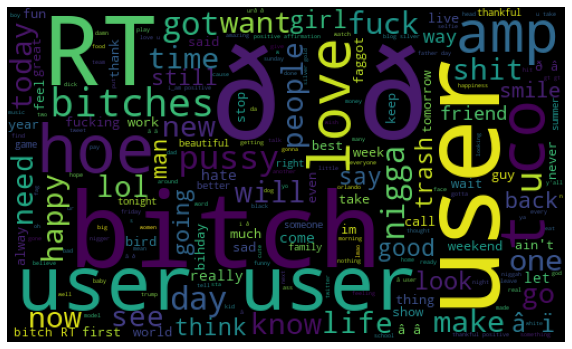

In [ ]:
allWords = ' '.join([twts for twts in df['tweet']])
wordCloud = WordCloud(width = 500, height = 300, max_font_size = 110).generate(allWords)

plt.figure(figsize=(10,8))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## Data Visualization (Toxic Tweets)

In [ ]:
allWords = ' '.join([twts for twts in df[df['Toxicity'] == 1]['tweet']])

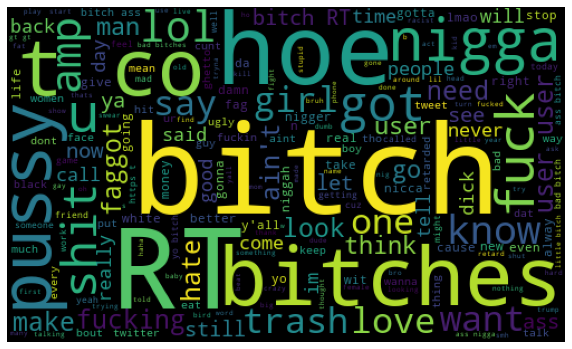

In [ ]:
wordCloud = WordCloud(width = 500, height = 300, max_font_size = 110).generate(allWords)
plt.figure(figsize=(10,8))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## Data Visualization (Non-toxic)

In [ ]:
allWords = ' '.join([twts for twts in df[df['Toxicity'] == 0]['tweet']])

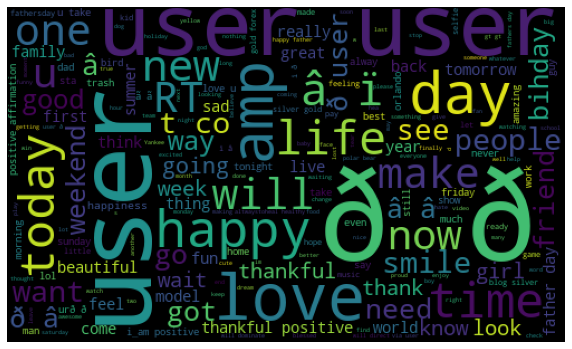

In [ ]:
wordCloud = WordCloud(width = 500, height = 300, max_font_size = 110).generate(allWords)
plt.figure(figsize=(10,8))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

## Cleaning Data

In [ ]:
X = df['tweet'].copy()
y = df['Toxicity'].copy()

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\ROG
[nltk_data]     STRIX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def data_cleaner(tweet):
    tweet = tweet.lower()
    tweet = tweet.replace(":("," sedih")
    tweet = tweet.replace(":)"," senang")
    tweet = tweet.replace(":3"," lucu")
    tweet = tweet.replace(":d"," senang")
    tweet = tweet.replace(":-)"," senang")
    tweet = tweet.replace("=)"," senang")
    tweet = re.sub(r'http\S+', ' ', tweet)   # remove urls
    tweet = re.sub(r'<.*?>',' ', tweet)      # remove html tags
    tweet = re.sub(r'\d+',' ', tweet)        # remove digits
    tweet = re.sub(r'#\w+',' ', tweet)       # remove hashtags
    tweet = re.sub(r'@\w+',' ', tweet)       # remove mentions
    tweet = re.sub(r'[^\w\s]',' ', tweet)    # remove punctuation
    tweet = re.sub('[^A-Za-z0-9 ]+', '', tweet) # remove characters that are not a letters or numbers
    tweet = " ".join([word for word in tweet.split() if not word in stop_words])   # remove stop words
    tweet = stemmer.stem(tweet)
    tweet = tweet.strip()
    return tweet

In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer("english")

X_cleaned = X.apply(data_cleaner)
X_cleaned

0         father dysfunctional selfish drags kids dysfunct
1        thanks credit use cause offer wheelchair vans pdx
2                                           bihday majesti
3                                    love u take u time ur
4                                       factsguide societi
                               ...                        
56740    muthaf lie pearls right tl trash mine bible sc...
56741      gone broke wrong heart baby drove redneck crazi
56742    young buck wanna eat dat nigguh like aint fuck...
56743                      youu got wild bitches tellin li
56744    ruffled ntac eileen dahlia beautiful color com...
Name: tweet, Length: 56745, dtype: object

## Tokenizing

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_cleaned)
X = tokenizer.texts_to_sequences(X_cleaned)
vocab_size = len(tokenizer.word_index)+1

print("Vocab size: {}".format(vocab_size))
print("\n Example: \n")
print("Sentence:\n{}".format(X_cleaned[2]))
print("\nAfter tokenizing:\n{}".format(X[2]))

X = pad_sequences(X, padding = "post")
print("\nAfter padding:\n{}".format(X[2]))

Vocab size: 32482

 Example: 

Sentence:
bihday majesti

After tokenizing:
[67, 6492]

After padding:
[  67 6492    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


## Check Distribution of Class

<AxesSubplot:xlabel='Toxicity', ylabel='count'>

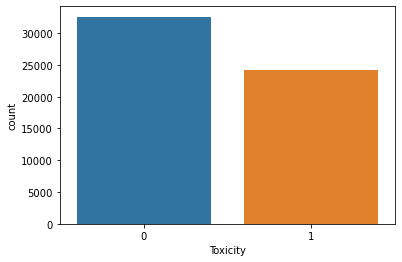

In [ ]:
sns.countplot(x="Toxicity",data=df)

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state = 10)

## Train Model

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
epochs = 5
batch_size = 64
embedding_dim = 64
units = 256

In [ ]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=X.shape[1]),
    L.LSTM(units),
    L.Dense(512,activation="sigmoid"),
    L.Dense(2,activation="softmax")
])

In [ ]:
model.compile(
    loss=SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 37, 64)            2078848   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               328704    
_________________________________________________________________
dense (Dense)                (None, 512)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 2,540,162
Trainable params: 2,540,162
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_test,y_test), batch_size = batch_size)

Epoch 1/5
665/665 [==============================] - 90s 131ms/step - loss: 0.6885 - accuracy: 0.5588 - val_loss: 0.6777 - val_accuracy: 0.5696
Epoch 2/5
665/665 [==============================] - 85s 128ms/step - loss: 0.6552 - accuracy: 0.5592 - val_loss: 0.6030 - val_accuracy: 0.6189
Epoch 3/5
665/665 [==============================] - 102s 153ms/step - loss: 0.5868 - accuracy: 0.6294 - val_loss: 0.2919 - val_accuracy: 0.8980
Epoch 4/5
665/665 [==============================] - 88s 133ms/step - loss: 0.2367 - accuracy: 0.9183 - val_loss: 0.1917 - val_accuracy: 0.9327
Epoch 5/5
665/665 [==============================] - 89s 134ms/step - loss: 0.1067 - accuracy: 0.9639 - val_loss: 0.2036 - val_accuracy: 0.9316


## Predict Data Test

In [ ]:
predicted = model.predict_classes(X_test)
loss, accuracy = model.evaluate(X_test, y_test)

print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(accuracy))

444/444 [==============================] - 14s 31ms/step - loss: 0.2036 - accuracy: 0.9316
Test loss: 0.20362474024295807
Test Accuracy: 0.9316275715827942


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
cf = confusion_matrix(y_test,predicted)
cf

array([[7714,  367],
       [ 603, 5503]], dtype=int64)

<AxesSubplot:>

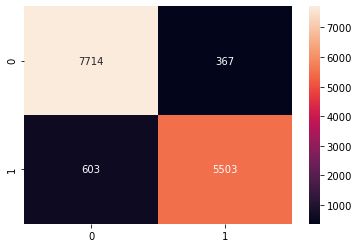

In [ ]:
sns.heatmap(cf,annot=True,fmt="d")

## Classification Report

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8081
           1       0.94      0.90      0.92      6106

    accuracy                           0.93     14187
   macro avg       0.93      0.93      0.93     14187
weighted avg       0.93      0.93      0.93     14187

